In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('communityghg.csv')

In [59]:
df.head()

,Protocol,Sector,Source,Year (Calendar Year),GHG Emissions (mt CO2e),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2005,2513636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2006,2193105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2007,2506091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2008,2458906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Global Protocol for Community-Scale Greenhouse...,Commercial/Industrial/Large Residential,Electricity,2009,2236563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


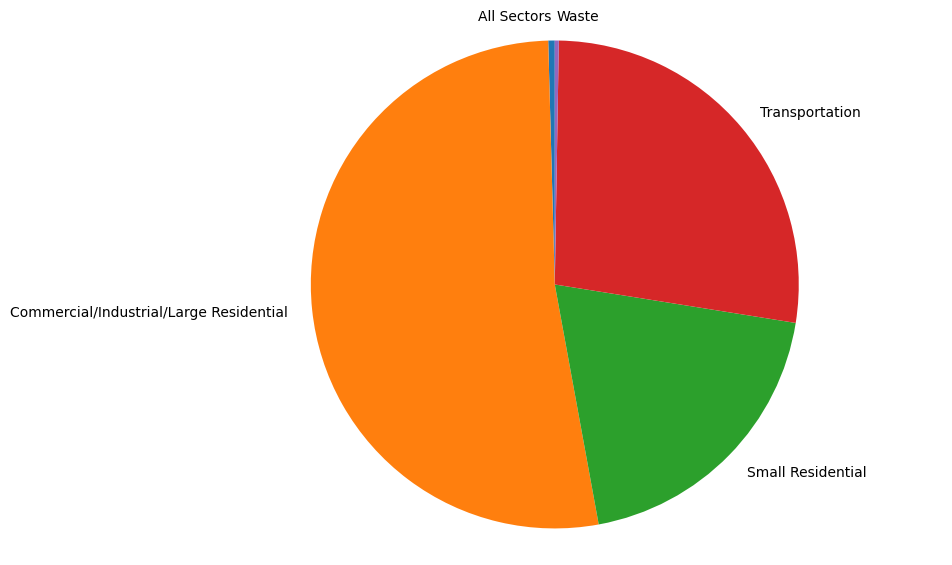

In [4]:
# GHG by Sector
# Convert 'GHG Emissions (mt CO2e)'to string, remove commas, and convert to float
df[' GHG Emissions (mt CO2e) '] = df[' GHG Emissions (mt CO2e) '].astype(str).str.replace(',', '').astype(float)

# Aggregate GHG emissions by sector
sector_emissions = df.groupby('Sector')[' GHG Emissions (mt CO2e) '].sum().reset_index()

# Extract sizes (emissions values) and labels (sector names) for the pie chart
sizes = sector_emissions[' GHG Emissions (mt CO2e) '].tolist()  # Ensure this is a list
labels = sector_emissions['Sector'].tolist()  # Ensure this is a list

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, startangle=90)
plt.axis('equal')  # This ensures the pie chart is a circle.
plt.show()

In [83]:
x_var = df[' GHG Emissions (mt CO2e) '].astype(int)
x_var=(x_var)
groupby_var = ('Sector')
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
print(x_var)

/Users/rnur/opt/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



TypeError: unhashable type: 'Series'

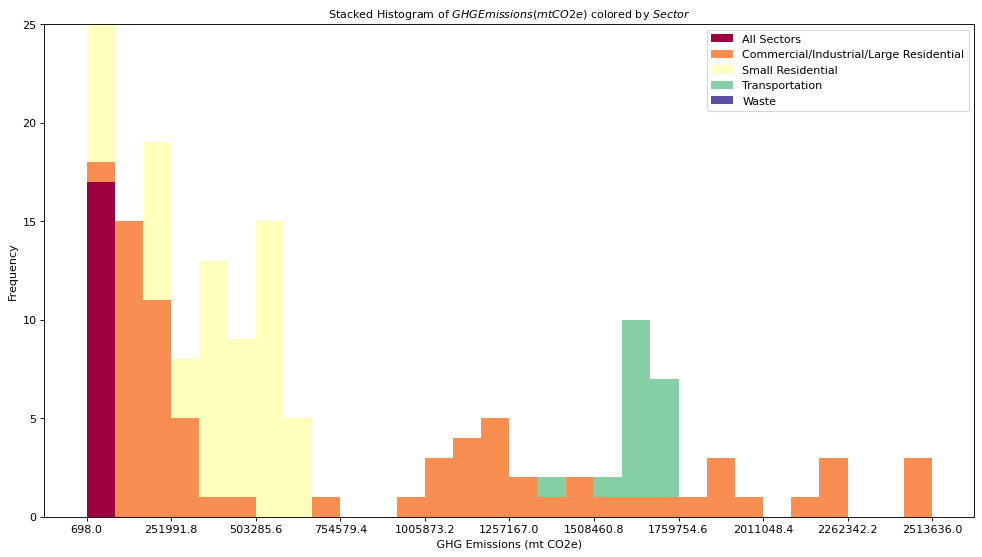

In [85]:
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#2.-Bubble-plot-with-Encircling

import numpy as np

# Prepare data
x_var = (' GHG Emissions (mt CO2e) ')
groupby_var = ('Sector')
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(15,8), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=10)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

In [6]:
# Group by 'Sector' and 'Source', then sum GHG emissions
emissions_summary = df.groupby(['Sector', 'Source'])[' GHG Emissions (mt CO2e) '].sum().reset_index()
# Initialize dictionary 
most_efficient_sources = {}

# Iterate through each  sector
for sector in emissions_summary['Sector'].unique():
    sector_data = emissions_summary[emissions_summary['Sector'] == sector]
    most_efficient_row = sector_data.loc[sector_data[' GHG Emissions (mt CO2e) '].idxmin()]
    
    # Update dictionary
    most_efficient_sources[sector] = most_efficient_row['Source']
# Print 
for sector, source in most_efficient_sources.items():
    print(f"Most Efficient Source in {sector}: {source}")

Most Efficient Source in All Sectors: Fugitive gas
Most Efficient Source in Commercial/Industrial/Large Residential: Steam
Most Efficient Source in Small Residential: Steam
Most Efficient Source in Transportation: Massport CNG
Most Efficient Source in Waste: Compost


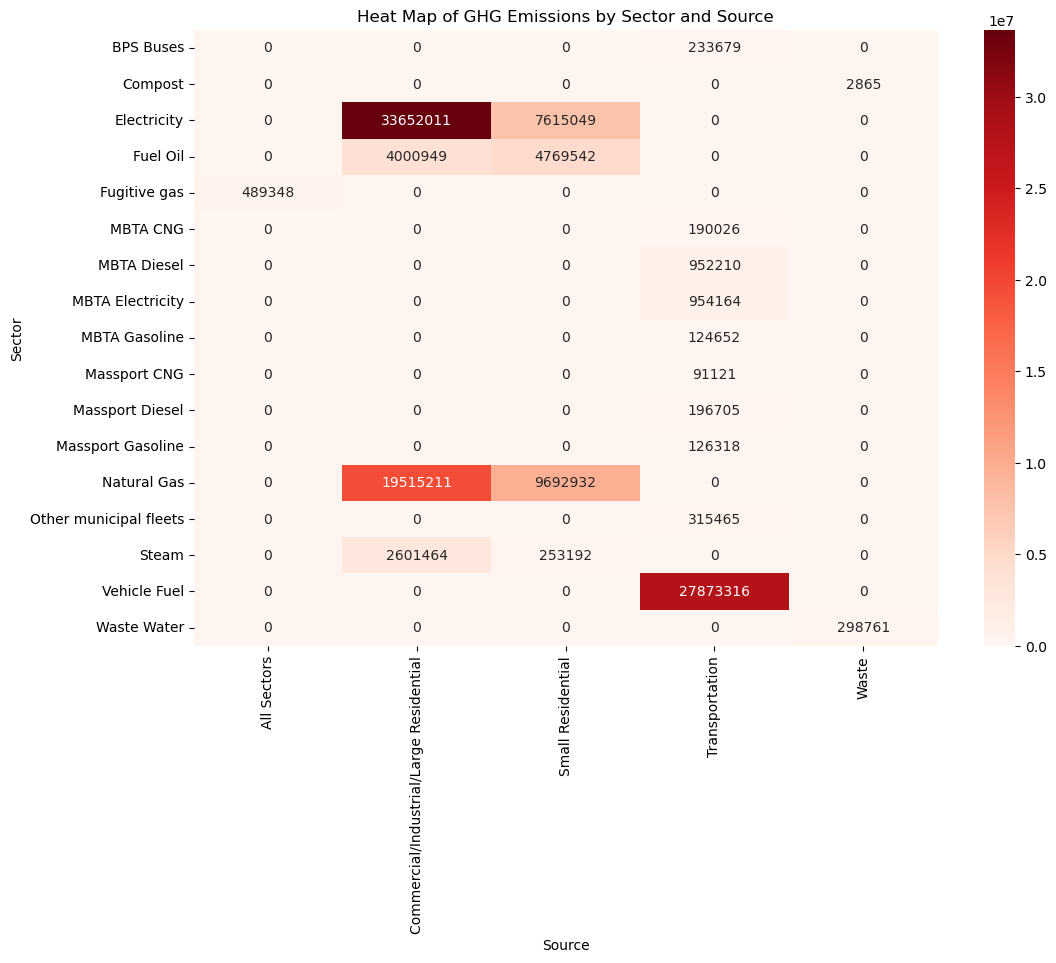

In [30]:
# Assuming your DataFrame 'df' includes 'Source' and it's properly cleaned
# Create a pivot table
pivot_table = df.pivot_table(values=' GHG Emissions (mt CO2e) ', index='Source', columns='Sector', aggfunc='sum', fill_value=0)

# Generate the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".0f")
plt.title('Heat Map of GHG Emissions by Sector and Source')
plt.xlabel('Source')
plt.ylabel('Sector')
plt.show()

In [12]:
# https://plotly.com/python/sankey-diagram/

import plotly.graph_objects as go

# Create mappings for sectors and sources to integers
sector_ids = {sector: i for i, sector in enumerate(df['Sector'].unique())}
source_ids = {source: i + len(sector_ids) for i, source in enumerate(df['Source'].unique())}

# creat lists for source, target, and value
sources = []
targets = []
values = []

for _, row in df.iterrows():
    source_index = sector_ids[row['Sector']]
    target_index = source_ids[row['Source']]
    value = row[' GHG Emissions (mt CO2e) ']

    sources.append(source_index)
    targets.append(target_index)
    values.append(value)

# Define colors or use a default gradient
colors = ['rgba(%d, %d, %d, 0.6)' % (i, i * 10, i * 20) for i in range(len(sources))]

# Visualize Sankey Diagram 
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,  
        thickness=20,
        line=dict(color='black', width=0.5),
        label=list(sector_ids.keys()) + list(source_ids.keys()),  
        color='green'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    ))])

fig.update_layout(title_text="Sankey Diagram of GHG Emissions by Sector and Source", font_size=10)
fig.show()